EQUIPO 4:  

Natalia Sofía Salgado García        A01571008  
Luis Fernando Manzanares Sánchez    A01283738  
Emiliano Salinas Del Bosque         A01570972  
Alejandro Guevara Olivares          A00834438  

## Reto: Cruce Peatonal Inteligente

In [3]:
def run_max_cars(n, pedestrian_probabilities, steps):
    smart_crossing_avg_max_cars = []
    normal_crossing_avg_max_cars = []
    
    for p in pedestrian_probabilities:
        smart_max_cars = []
        normal_max_cars = []
        
        for i in range(n):
            # Run smart crossing simulation
            smart_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': True,
            }
            smart_model = CrossingModel(smart_params)
            smart_model.run(display=False)
            smart_metrics = metrics(smart_model)
            smart_max_cars.append(max(smart_metrics['Cars crossed per green light']))

            # Run normal crossing simulation
            normal_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': False,
            }
            normal_model = CrossingModel(normal_params)
            normal_model.run(display=False)
            normal_metrics = metrics(normal_model)
            normal_max_cars.append(max(normal_metrics['Cars crossed per green light']))
        
        # Calculate average maximum number of cars crossing per light for both smart and normal crossing
        smart_crossing_avg_max_cars.append(np.mean(smart_max_cars))
        normal_crossing_avg_max_cars.append(np.mean(normal_max_cars))
    
    # Plot the results
    fig, ax = plt.subplots()
    index = np.arange(len(pedestrian_probabilities))
    bar_width = 0.35
    
    rects1 = ax.bar(index, smart_crossing_avg_max_cars, bar_width, label='Smart Crossing', color='purple')
    rects2 = ax.bar(index + bar_width, normal_crossing_avg_max_cars, bar_width, label='Normal Crossing', color='pink')

    ax.set_xlabel('Pedestrian Probability')
    ax.set_ylabel('Average Max Cars Crossing per Light')
    ax.set_title('Average Max Cars Crossing per Green Light vs Pedestrian Probability')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(pedestrian_probabilities, rotation=45) 
    ax.set_xticklabels(pedestrian_probabilities)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
n = 10  # Number of simulations for each type
steps = 450
pedestrian_probabilities = (0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3)
run_max_cars(n, pedestrian_probabilities, steps)


### Análisis

#### Total de carros que cruzan con cantidad de carriles variable

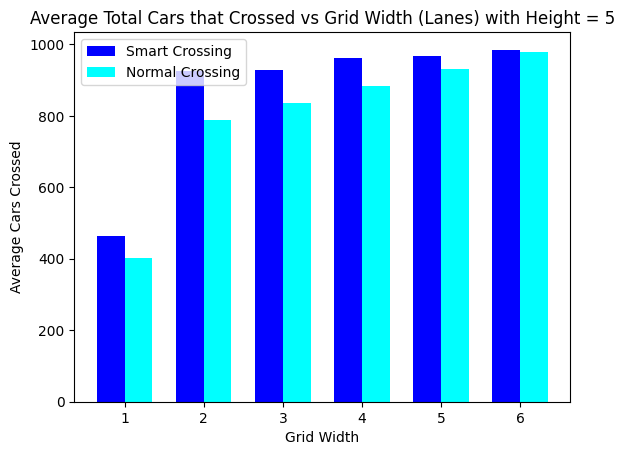

In [5]:
# Define the function to run the simulations
def run_varying_lanes(n, widths, height):
    smart_crossing_avg_cars = []
    normal_crossing_avg_cars = []
    
    for width in widths:
        smart_cars_crossed = []
        normal_cars_crossed = []
        
        for i in range(n):
            # Run smart crossing simulation
            smart_params = {
                'steps': 1000,
                'height': height,
                'width': width,
                'pedestrian_probability': 0.01,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': True,
            }
            smart_model = CrossingModel(smart_params)
            smart_model.run(display=False)
            smart_metrics = metrics(smart_model)
            smart_cars_crossed.append(smart_metrics['Total cars crossed'])

            # Run normal crossing simulation
            normal_params = {
                'steps': 1000,
                'height': height,
                'width': width,
                'pedestrian_probability': 0.01,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': False,
            }
            normal_model = CrossingModel(normal_params)
            normal_model.run(display=False)
            normal_metrics = metrics(normal_model)
            normal_cars_crossed.append(normal_metrics['Total cars crossed'])
        
        # Calculate average cars crossed for both smart and normal crossing
        smart_crossing_avg_cars.append(np.mean(smart_cars_crossed))
        normal_crossing_avg_cars.append(np.mean(normal_cars_crossed))
    
    # Plot the results
    fig, ax = plt.subplots()
    bar_width = 0.35
    index = np.arange(len(widths))
    
    bar1 = ax.bar(index, smart_crossing_avg_cars, bar_width, label='Smart Crossing', color='blue')
    bar2 = ax.bar(index + bar_width, normal_crossing_avg_cars, bar_width, label='Normal Crossing', color='cyan')
    
    ax.set_xlabel('Grid Width')
    ax.set_ylabel('Average Cars Crossed')
    ax.set_title('Average Total Cars that Crossed vs Grid Width (Lanes) with Height = 5')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([str(width-4) for width in widths])
    ax.legend()
    
    plt.show()

n = 10  # Number of simulations for each type
widths = [5,6,7,8,9,10]
height = 5  # Keeping height constant
run_varying_lanes(n, widths, height)

#### Tiempo total promedio de luz en rojo

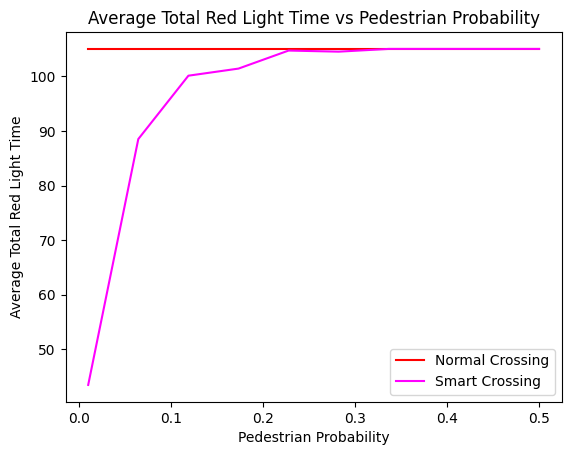

In [9]:
# Define the function to run the simulations
def run_red_light_simulations(n, pedestrian_probabilities, steps):
    smart_crossing_avg_red_light = []
    normal_crossing_avg_red_light = []
    
    for p in pedestrian_probabilities:
        smart_red_light_times = []
        normal_red_light_times = []
        
        for i in range(n):
            # Run smart crossing simulation
            smart_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': True,
            }
            smart_model = CrossingModel(smart_params)
            smart_model.run(display=False)
            smart_metrics = metrics(smart_model)
            smart_red_light_times.append(smart_metrics['Total red light time'])

            # Run normal crossing simulation
            normal_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': False,
            }
            normal_model = CrossingModel(normal_params)
            normal_model.run(display=False)
            normal_metrics = metrics(normal_model)
            normal_red_light_times.append(normal_metrics['Total red light time'])
        
        # Calculate average total red light time for both smart and normal crossing
        smart_crossing_avg_red_light.append(np.mean(smart_red_light_times))
        normal_crossing_avg_red_light.append(np.mean(normal_red_light_times))
    
    # Plot the results
    fig, ax = plt.subplots()
    ax.plot(pedestrian_probabilities, normal_crossing_avg_red_light, label='Normal Crossing', color='red')
    ax.plot(pedestrian_probabilities, smart_crossing_avg_red_light, label='Smart Crossing', color='magenta')
    
    ax.set_xlabel('Pedestrian Probability')
    ax.set_ylabel('Average Total Red Light Time')
    ax.set_title('Average Total Red Light Time vs Pedestrian Probability')
    ax.legend()
    
    plt.show()

n = 10  # Number of simulations for each type
steps = 450
pedestrian_probabilities = np.linspace(0.01, 0.5, 10)
run_red_light_simulations(n, pedestrian_probabilities, steps)

#### Promedio de máxima cantidad de carros que cruzan en una luz verde

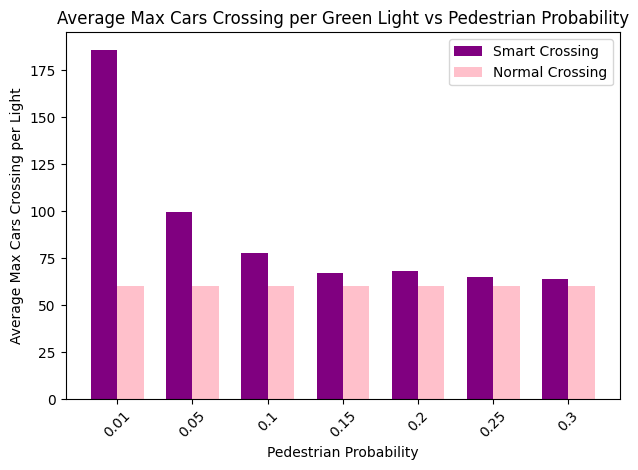

In [8]:
def run_max_cars(n, pedestrian_probabilities, steps):
    smart_crossing_avg_max_cars = []
    normal_crossing_avg_max_cars = []
    
    for p in pedestrian_probabilities:
        smart_max_cars = []
        normal_max_cars = []
        
        for i in range(n):
            # Run smart crossing simulation
            smart_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': True,
            }
            smart_model = CrossingModel(smart_params)
            smart_model.run(display=False)
            smart_metrics = metrics(smart_model)
            smart_max_cars.append(max(smart_metrics['Cars crossed per green light']))

            # Run normal crossing simulation
            normal_params = {
                'steps': steps,
                'height': 12,
                'width': 9,
                'pedestrian_probability': p,
                'request_delay': 30,
                'red_duration': 15,
                'smart_crossing': False,
            }
            normal_model = CrossingModel(normal_params)
            normal_model.run(display=False)
            normal_metrics = metrics(normal_model)
            normal_max_cars.append(max(normal_metrics['Cars crossed per green light']))
        
        # Calculate average maximum number of cars crossing per light for both smart and normal crossing
        smart_crossing_avg_max_cars.append(np.mean(smart_max_cars))
        normal_crossing_avg_max_cars.append(np.mean(normal_max_cars))
    
    # Plot the results
    fig, ax = plt.subplots()
    index = np.arange(len(pedestrian_probabilities))
    bar_width = 0.35
    
    rects1 = ax.bar(index, smart_crossing_avg_max_cars, bar_width, label='Smart Crossing', color='purple')
    rects2 = ax.bar(index + bar_width, normal_crossing_avg_max_cars, bar_width, label='Normal Crossing', color='pink')

    ax.set_xlabel('Pedestrian Probability')
    ax.set_ylabel('Average Max Cars Crossing per Light')
    ax.set_title('Average Max Cars Crossing per Green Light vs Pedestrian Probability')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(pedestrian_probabilities, rotation=45) 
    ax.set_xticklabels(pedestrian_probabilities)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
n = 10  # Number of simulations for each type
steps = 450
pedestrian_probabilities = (0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3)
run_max_cars(n, pedestrian_probabilities, steps)
